# Парсер вакансий с HeadHunter


## Что для этого будем использовать?
* requests - для отправки запросов к API HH
* json - для декодирования ответов в удобном формате
* pandas - для формирования таблицы 
* matplotlib, seaborn - визуализация
* IPython для магических штук

### Импорт библиотек

In [1]:
import requests
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import time

from IPython.core.display import display, HTML, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 30)

Создадим необходимые константы: BASE_URL

In [2]:
BASE_URL = "https://api.hh.ru/"
TEXT = f'NAME:("Machine Learning Engineer" OR "Data Scientist" OR "Дата саентист" OR "Machine Learning Developer" or "Machine Learning Researcher" or "Искусственный интеллект" or "Машинное обучение" or "Специалист по machine learning" or "Специалист по машинному обучению" or "AI engineer" or "Разработчик ML" or "Data Science" or "Machine Learning" or "Artificial Intelligence" or "ML Engineer" or "Аналитик" or "Analyst" or "Data Engineer" or "DWH" or "BI" or "Business Intelligence" or "Data инженер" or "Инженер данных" or "ETL" or "КХД")'
dt_now = datetime.now().date()
dt_from = dt_now - timedelta(days=7)
DATE_TO = '%s-%02d-%02d' % (dt_now.year, dt_now.month, dt_now.day)
DATE_FROM = '%s-%02d-%02d' % (dt_from.year, dt_from.month, dt_from.day)

VAC_URL = BASE_URL + f'vacancies?text={TEXT}&date_from={DATE_FROM}&date_to={DATE_TO}&responses_count_enabled=True&per_page=100'

In [3]:
DATE_FROM

'2022-07-14'

In [4]:
vacancy_df = pd.DataFrame()


В выдаче апи hh нет опыта, поэтому укажем его в запросе:

In [5]:
experiences = ['noExperience',
               'between1And3']
               #,               'between3And6''moreThan6' 
               

In [6]:
for exp in experiences:
    page = 0
    url = VAC_URL + f'&experience={exp}'
    try:
        r = requests.get(url + f'&page={page}')
        data = json.loads(r.text)
        print('Количество страниц ', exp, data['pages'])
        items = data['items']
        for page in range(1, data['pages']):
            r = requests.get(url + f'&page={page}')
            data = json.loads(r.text)
            items += data['items']
        df = pd.DataFrame(items)
        df['experience'] = exp
        vacancy_df = pd.concat([vacancy_df, df])
    except Exception as e:
        print(e)

Количество страниц  noExperience 4
Количество страниц  between1And3 20


In [7]:
vacancy_df.reset_index(drop=True, inplace=True)

In [8]:
vacancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        2381 non-null   object
 1   premium                   2381 non-null   bool  
 2   name                      2381 non-null   object
 3   department                277 non-null    object
 4   has_test                  2381 non-null   bool  
 5   response_letter_required  2381 non-null   bool  
 6   area                      2381 non-null   object
 7   salary                    940 non-null    object
 8   type                      2381 non-null   object
 9   address                   1435 non-null   object
 10  response_url              0 non-null      object
 11  sort_point_distance       0 non-null      object
 12  published_at              2381 non-null   object
 13  created_at                2381 non-null   object
 14  archived                

In [9]:
vacancy_df.head()

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,response_url,sort_point_distance,published_at,created_at,archived,...,insider_interview,url,adv_response_url,alternate_url,relations,employer,snippet,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience
0,68035881,False,Data инженер,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",None,None,2022-07-21T15:36:35+0300,2022-07-21T15:36:35+0300,False,...,None,https://api.hh.ru/vacancies/68035881?host=hh.ru,https://api.hh.ru/vacancies/68035881/adv_respo...,https://hh.ru/vacancy/68035881,[],"{'id': '116803', 'name': 'БКИ ЭКВИФАКС', 'url'...",{'requirement': 'Техническое / экономическое о...,None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 8},[],[],[],False,noExperience
1,67886695,False,Аналитик,None,False,False,"{'id': '71', 'name': 'Пенза', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Пенза', 'street': 'улица Аустрина', ...",None,None,2022-07-21T17:35:51+0300,2022-07-21T17:35:51+0300,False,...,None,https://api.hh.ru/vacancies/67886695?host=hh.ru,https://api.hh.ru/vacancies/67886695/adv_respo...,https://hh.ru/vacancy/67886695,[],"{'id': '3389915', 'name': 'Мебельная компания ...","{'requirement': None, 'responsibility': 'Орган...",None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 0},[],[],[],False,noExperience
2,68029059,False,Аналитик,None,False,False,"{'id': '88', 'name': 'Казань', 'url': 'https:/...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Казань', 'street': 'Петербургская ул...",None,None,2022-07-21T13:27:47+0300,2022-07-21T13:27:47+0300,False,...,None,https://api.hh.ru/vacancies/68029059?host=hh.ru,https://api.hh.ru/vacancies/68029059/adv_respo...,https://hh.ru/vacancy/68029059,[],"{'id': '7944', 'name': 'Совкомбанк', 'url': 'h...",{'requirement': 'Знание excel. Знание рowerpoi...,None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 6},[],[],[],False,noExperience
3,67887990,False,Стажер в лабораторию искусственного интеллекта...,"{'id': '3529-3529-it', 'name': 'Сбер. IT'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 53000, 'to': 58000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Кутузовский прос...",None,None,2022-07-18T18:18:17+0300,2022-07-18T18:18:17+0300,False,...,None,https://api.hh.ru/vacancies/67887990?host=hh.ru,https://api.hh.ru/vacancies/67887990/adv_respo...,https://hh.ru/vacancy/67887990,[],"{'id': '3529', 'name': 'СБЕР', 'url': 'https:/...",{'requirement': 'Уверенное владение языком про...,None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 310},[],[],[],False,noExperience
4,66072915,False,Аналитик,None,False,False,"{'id': '160', 'name': 'Алматы', 'url': 'https:...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-07-21T09:07:53+0300,2022-07-21T09:07:53+0300,False,...,None,https://api.hh.ru/vacancies/66072915?host=hh.ru,https://api.hh.ru/vacancies/66072915/adv_respo...,https://hh.ru/vacancy/66072915,[],"{'id': '2848965', 'name': 'Сәтті Жұлдыз', 'url...",{'requirement': 'Отличное знание Excel. Владен...,None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 7},[],[],[],False,noExperience


### Вытащим ценную информацию из словарей

In [10]:
def return_id(x, key='id', nan_value=np.nan):
    try:
        return x[key]
    except Exception as e:
        return nan_value

In [11]:
vacancy_df['employer_name'] = vacancy_df['employer'].apply(return_id, key='name')
vacancy_df['department_name'] = vacancy_df['department'].apply(return_id, key='name')
vacancy_df['salary_from'] = vacancy_df['salary'].apply(return_id, key='from')
vacancy_df['salary_to'] = vacancy_df['salary'].apply(return_id, key='to')
vacancy_df['salary_gross'] = vacancy_df['salary'].apply(return_id, key='gross')
vacancy_df['salary_currency'] = vacancy_df['salary'].apply(return_id, key='currency')
vacancy_df['counters'] = vacancy_df['counters'].apply(return_id, key='responses')
vacancy_df['city'] = vacancy_df['area'].apply(return_id, key='name')

In [12]:
vacancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2381 non-null   object 
 1   premium                   2381 non-null   bool   
 2   name                      2381 non-null   object 
 3   department                277 non-null    object 
 4   has_test                  2381 non-null   bool   
 5   response_letter_required  2381 non-null   bool   
 6   area                      2381 non-null   object 
 7   salary                    940 non-null    object 
 8   type                      2381 non-null   object 
 9   address                   1435 non-null   object 
 10  response_url              0 non-null      object 
 11  sort_point_distance       0 non-null      object 
 12  published_at              2381 non-null   object 
 13  created_at                2381 non-null   object 
 14  archived

In [13]:
vacancy_df.head(10)

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,response_url,sort_point_distance,published_at,created_at,archived,...,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,city
0,68035881,False,Data инженер,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",None,None,2022-07-21T15:36:35+0300,2022-07-21T15:36:35+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",8,[],[],[],False,noExperience,БКИ ЭКВИФАКС,NaN,NaN,NaN,NaN,NaN,Москва
1,67886695,False,Аналитик,None,False,False,"{'id': '71', 'name': 'Пенза', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Пенза', 'street': 'улица Аустрина', ...",None,None,2022-07-21T17:35:51+0300,2022-07-21T17:35:51+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",0,[],[],[],False,noExperience,Мебельная компания Стиль,NaN,NaN,NaN,NaN,NaN,Пенза
2,68029059,False,Аналитик,None,False,False,"{'id': '88', 'name': 'Казань', 'url': 'https:/...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Казань', 'street': 'Петербургская ул...",None,None,2022-07-21T13:27:47+0300,2022-07-21T13:27:47+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",6,[],[],[],False,noExperience,Совкомбанк,NaN,NaN,NaN,NaN,NaN,Казань
3,67887990,False,Стажер в лабораторию искусственного интеллекта...,"{'id': '3529-3529-it', 'name': 'Сбер. IT'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 53000, 'to': 58000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Кутузовский прос...",None,None,2022-07-18T18:18:17+0300,2022-07-18T18:18:17+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",310,[],[],[],False,noExperience,СБЕР,Сбер. IT,53000.0,58000.0,True,RUR,Москва
4,66072915,False,Аналитик,None,False,False,"{'id': '160', 'name': 'Алматы', 'url': 'https:...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-07-21T09:07:53+0300,2022-07-21T09:07:53+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",7,[],[],[],False,noExperience,Сәтті Жұлдыз,NaN,NaN,NaN,NaN,NaN,Алматы
5,39904397,False,Продуктовый аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Головинское шосс...",None,None,2022-07-21T14:48:00+0300,2022-07-21T14:48:00+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",8,[],[],[],False,noExperience,Тинькофф,NaN,NaN,NaN,NaN,NaN,Москва
6,67162466,False,Младший аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 50000, 'to': 55000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-07-21T14:08:35+0300,2022-07-21T14:08:35+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",656,[],[],[],False,noExperience,mnews,NaN,50000.0,55000.0,False,RUR,Москва
7,66081411,False,Архитектор КХД,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Красногорск', 'street': 'бульвар Стр...",None,None,2022-07-21T11:02:20+0300,2022-07-21T11:02:20+0300,False,...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",41,[],[],[],False,noExperience,СИТИЛИНК,NaN,NaN,NaN,NaN,NaN,Москва
8,68030471,False,Специалист-аналитик,None,False,False,"{'id': '1571', 'name': 'Орск', 'url': 'https:/...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-07-21T13:51:42+0300,2022-07-21T13:51:42+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",1,[],[],[],False,noExperience,УК Легион,NaN,NaN,NaN,NaN,NaN,Орск
9,53822966,False,Системный аналитик,None,False,False,"{'id': '68', 'name': 'Омск', 'url': 'https://a...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Омск', 

###Дубликаты

In [14]:
vacancy_df[vacancy_df.duplicated(['employer_name', 'name'], keep=False)][['employer_name', 'name', 'city', 'experience']].sort_values(by=['name'])

,employer_name,name,city,experience
1380,Лукрум,1С Аналитик (бухгалтер-экономист),Архангельск,between1And3
1381,Лукрум,1С Аналитик (бухгалтер-экономист),Псков,between1And3
763,СимбирСофт,1С аналитик,Казань,between1And3
764,СимбирСофт,1С аналитик,Санкт-Петербург,between1And3
2188,Эр-1,BI аналитик,Москва,between1And3
...,...,...,...,...
2173,Свинокомплекс Уральский,Химик-аналитик,Талица,between1And3
2174,Свинокомплекс Уральский,Химик-аналитик,Тугулым,between1And3
2175,Свинокомплекс Уральский,Химик-аналитик,Камышлов,between1And3
81,Биннофарм Групп,Химик-аналитик,Кременки,noExperience


### Посмотрим компании, предлагающие вакансии, а также города

<AxesSubplot:>

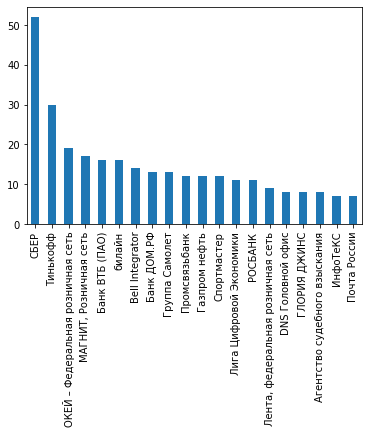

In [15]:
vacancy_df['employer_name'].value_counts().head(20).plot(kind='bar')

<AxesSubplot:>

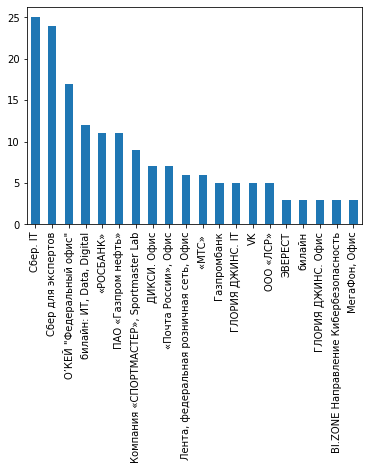

In [16]:
vacancy_df['department_name'].value_counts().head(20).plot(kind='bar')

<AxesSubplot:>

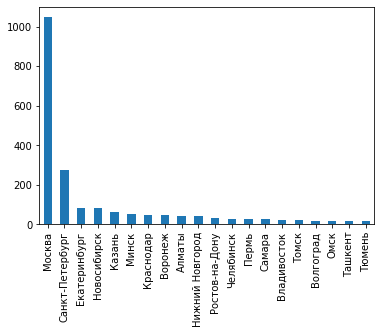

In [17]:
vacancy_df['city'].value_counts().head(20).plot(kind='bar')

### Что с зарплатой?

In [18]:
vacancy_df['salary_from'].isna().value_counts(normalize=True)

True     0.658547
False    0.341453
Name: salary_from, dtype: float64

In [19]:
vacancy_df['salary_currency'].value_counts(normalize=True)

RUR    0.944681
KZT    0.021277
USD    0.010638
UZS    0.010638
BYR    0.010638
EUR    0.001064
KGS    0.001064
Name: salary_currency, dtype: float64

In [20]:
salaries = vacancy_df.query("salary_currency == 'RUR' and experience in ['noExperience', 'between1And3']").groupby(['employer_name', 'department_name']).mean()['salary_from'].reset_index()

<AxesSubplot:xlabel='employer_name', ylabel='salary_from'>

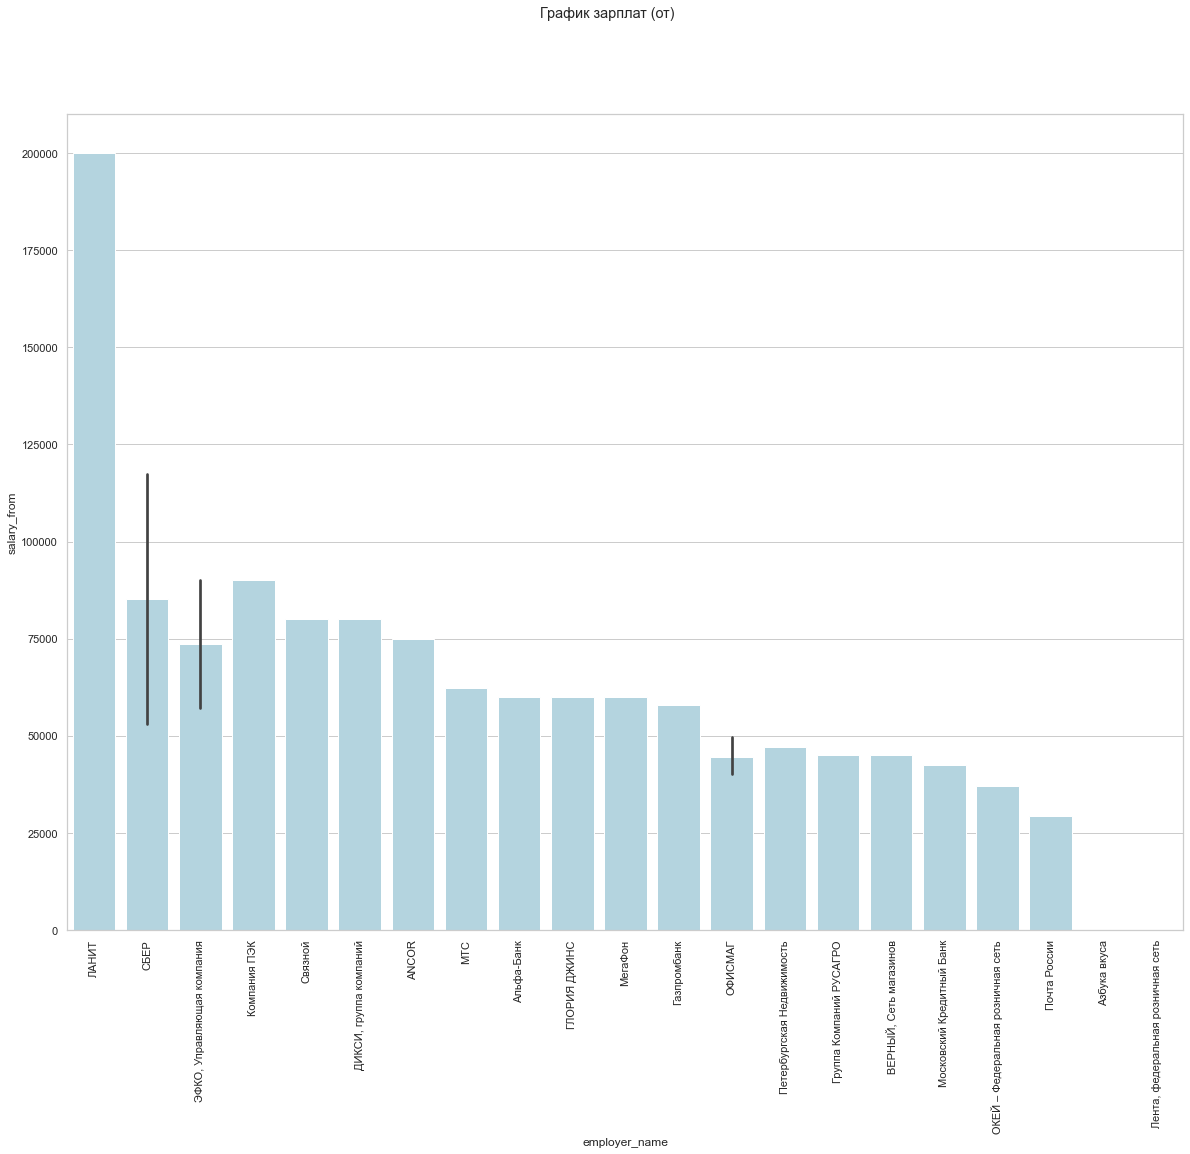

In [21]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(20,15))                
title = 'График зарплат (от)'
fig.suptitle(title)
plt.xticks(rotation=90)  
sns.barplot(data=salaries.sort_values(by='salary_from', ascending=False), x='employer_name', y='salary_from', color='lightblue', ax=ax)

In [22]:
salaries

,employer_name,department_name,salary_from
0,ANCOR,ANCOR,75000.000000
1,Азбука вкуса,Офис «Азбука вкуса»,NaN
2,Альфа-Банк,Альфа-Банк,60000.000000
3,"ВЕРНЫЙ, Сеть магазинов",Верный.Офис,45000.000000
4,ГЛОРИЯ ДЖИНС,ГЛОРИЯ ДЖИНС. Офис,60000.000000
5,Газпромбанк,Газпромбанк,58000.000000
6,Группа Компаний РУСАГРО,"«РУСАГРО», Сельскохозяйственное бизнес-направл...",45000.000000
7,"ДИКСИ, группа компаний",ДИКСИ. Офис,80000.000000
8,Компания ПЭК,ПЭК / Склад,90000.000000
9,ЛАНИТ,diHouse (ГК ЛАНИТ),200000.000000


In [23]:
vacancy_df.dropna(subset=['employer_name', 'salary_from'])[vacancy_df['employer_name'].str.lower().str.contains('альфа')]

C:\Temp/ipykernel_10956/2808624732.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vacancy_df.dropna(subset=['employer_name', 'salary_from'])[vacancy_df['employer_name'].str.lower().str.contains('альфа')]


,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,response_url,sort_point_distance,published_at,created_at,archived,...,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,city
362,67784329,False,Помощник аналитика,None,False,False,"{'id': '26', 'name': 'Воронеж', 'url': 'https:...","{'from': 30000, 'to': 40000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-07-14T16:56:35+0300,2022-07-14T16:56:35+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",3,[],[],[],True,noExperience,Альфатория,NaN,30000.0,40000.0,True,RUR,Воронеж
799,66137586,False,Кредитный аналитик (блок МСБ),"{'id': '80-80-bank', 'name': ' Альфа-Банк'}",False,False,"{'id': '1641', 'name': 'Набережные Челны', 'ur...","{'from': 60000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-07-21T17:01:01+0300,2022-07-21T17:01:01+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",0,[],[],[],False,between1And3,Альфа-Банк,Альфа-Банк,60000.0,NaN,True,RUR,Набережные Челны


### Ищем вакансии

In [25]:
city_vacs = vacancy_df[(vacancy_df['city'] == "Москва") | (vacancy_df['city'] == "Калининград")]

In [26]:
city_vacs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 2376
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1052 non-null   object 
 1   premium                   1052 non-null   bool   
 2   name                      1052 non-null   object 
 3   department                142 non-null    object 
 4   has_test                  1052 non-null   bool   
 5   response_letter_required  1052 non-null   bool   
 6   area                      1052 non-null   object 
 7   salary                    317 non-null    object 
 8   type                      1052 non-null   object 
 9   address                   638 non-null    object 
 10  response_url              0 non-null      object 
 11  sort_point_distance       0 non-null      object 
 12  published_at              1052 non-null   object 
 13  created_at                1052 non-null   object 
 14  archived

In [27]:
city_vacs.head(50)

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,response_url,sort_point_distance,published_at,created_at,archived,...,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,city
0,68035881,False,Data инженер,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",None,None,2022-07-21T15:36:35+0300,2022-07-21T15:36:35+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",8,[],[],[],False,noExperience,БКИ ЭКВИФАКС,NaN,NaN,NaN,NaN,NaN,Москва
3,67887990,False,Стажер в лабораторию искусственного интеллекта...,"{'id': '3529-3529-it', 'name': 'Сбер. IT'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 53000, 'to': 58000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Кутузовский прос...",None,None,2022-07-18T18:18:17+0300,2022-07-18T18:18:17+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",310,[],[],[],False,noExperience,СБЕР,Сбер. IT,53000.0,58000.0,True,RUR,Москва
5,39904397,False,Продуктовый аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Головинское шосс...",None,None,2022-07-21T14:48:00+0300,2022-07-21T14:48:00+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",8,[],[],[],False,noExperience,Тинькофф,NaN,NaN,NaN,NaN,NaN,Москва
6,67162466,False,Младший аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 50000, 'to': 55000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-07-21T14:08:35+0300,2022-07-21T14:08:35+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",656,[],[],[],False,noExperience,mnews,NaN,50000.0,55000.0,False,RUR,Москва
7,66081411,False,Архитектор КХД,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Красногорск', 'street': 'бульвар Стр...",None,None,2022-07-21T11:02:20+0300,2022-07-21T11:02:20+0300,False,...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",41,[],[],[],False,noExperience,СИТИЛИНК,NaN,NaN,NaN,NaN,NaN,Москва
10,68028993,False,Аналитик-стажёр,None,True,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Преображенская п...",None,None,2022-07-21T13:26:30+0300,2022-07-21T13:26:30+0300,False,...,None,"{'id': 'flexible', 'name': 'Гибкий график'}",161,[],[],[],False,noExperience,Почта Банк,NaN,NaN,NaN,NaN,NaN,Москва
11,67244761,False,Младший аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 40000, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Малый Головин пе...",None,None,2022-07-21T13:06:32+0300,2022-07-21T13:06:32+0300,False,...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",1469,[],[],[],True,noExperience,La Redoute Rus,NaN,NaN,40000.0,True,RUR,Москва
12,66219673,False,Младший аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Одесская улица',...",None,None,2022-07-21T12:22:33+0300,2022-07-21T12:22:33+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",0,[],[],[],False,noExperience,Интерфакс,NaN,NaN,NaN,NaN,NaN,Москва
14,55861157,False,Business analyst (India),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-07-21T11:58:49+0300,2022-07-21T11:58:49+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",3,[],[],[],False,noExperience,Finstar Financial Group,NaN,NaN,NaN,NaN,NaN,Москва
17,67530668,False,Ве

### Смотрим содержание вакансий

In [28]:
vacs_df = city_vacs.copy().reset_index(drop=True).query("experience in ['noExperience', 'between1And3']")

In [29]:
vacs_df

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,response_url,sort_point_distance,published_at,created_at,archived,...,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,city
0,68035881,False,Data инженер,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",None,None,2022-07-21T15:36:35+0300,2022-07-21T15:36:35+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",8,[],[],[],False,noExperience,БКИ ЭКВИФАКС,NaN,NaN,NaN,NaN,NaN,Москва
1,67887990,False,Стажер в лабораторию искусственного интеллекта...,"{'id': '3529-3529-it', 'name': 'Сбер. IT'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 53000, 'to': 58000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Кутузовский прос...",None,None,2022-07-18T18:18:17+0300,2022-07-18T18:18:17+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",310,[],[],[],False,noExperience,СБЕР,Сбер. IT,53000.0,58000.0,True,RUR,Москва
2,39904397,False,Продуктовый аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Головинское шосс...",None,None,2022-07-21T14:48:00+0300,2022-07-21T14:48:00+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",8,[],[],[],False,noExperience,Тинькофф,NaN,NaN,NaN,NaN,NaN,Москва
3,67162466,False,Младший аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 50000, 'to': 55000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-07-21T14:08:35+0300,2022-07-21T14:08:35+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",656,[],[],[],False,noExperience,mnews,NaN,50000.0,55000.0,False,RUR,Москва
4,66081411,False,Архитектор КХД,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Красногорск', 'street': 'бульвар Стр...",None,None,2022-07-21T11:02:20+0300,2022-07-21T11:02:20+0300,False,...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",41,[],[],[],False,noExperience,СИТИЛИНК,NaN,NaN,NaN,NaN,NaN,Москва
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,67874779,False,Аналитик 1С,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'набережная Акаде...",None,None,2022-07-18T14:40:32+0300,2022-07-18T14:40:32+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",3,[],[],[],False,between1And3,Триал Маркет,NaN,NaN,NaN,NaN,NaN,Москва
1048,55513652,False,Консультант 1С/Аналитик 1С по бухгалтерскому у...,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 110000, 'to': 120000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица Гиляровско...",None,None,2022-07-20T14:16:35+0300,2022-07-20T14:16:35+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",10,[],[],[],False,between1And3,Энтер-Софт,NaN,110000.0,120000.0,False,RUR,Москва
1049,67874097,False,Аналитик планирования продаж,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-07-18T14:30:44+0300,2022-07-18T14:30:44+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",42,[],[],[],False,between1And3,Герофарм,NaN,NaN,NaN,NaN,NaN,Москва
1050,67464168,False,Системный аналитик / процессинг,"{'id': '3529-3529-it', 'name': 'Сбер. IT'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Кутузовский прос..."

In [30]:
vacs_df['url']

0       https://api.hh.ru/vacancies/68035881?host=hh.ru
1       https://api.hh.ru/vacancies/67887990?host=hh.ru
2       https://api.hh.ru/vacancies/39904397?host=hh.ru
3       https://api.hh.ru/vacancies/67162466?host=hh.ru
4       https://api.hh.ru/vacancies/66081411?host=hh.ru
                             ...                       
1047    https://api.hh.ru/vacancies/67874779?host=hh.ru
1048    https://api.hh.ru/vacancies/55513652?host=hh.ru
1049    https://api.hh.ru/vacancies/67874097?host=hh.ru
1050    https://api.hh.ru/vacancies/67464168?host=hh.ru
1051    https://api.hh.ru/vacancies/67785123?host=hh.ru
Name: url, Length: 1052, dtype: object

In [31]:
vacs = vacs_df['url'].apply(lambda x: HTML(json.loads(requests.get(x).text)['description']))


In [32]:
display(vacs.iloc[1])

In [33]:
button = widgets.Button(description="show")
output = widgets.Output()

display(button, output)

counter = 0
def on_clicked(b):
    with output:
        try:
            global counter
            clear_output()
            print('№ вакансии: ', counter)
            display(HTML("<h1>" + str(vacs_df['name'][counter]) + ' в ' + str(vacs_df['employer_name'][counter]) + "</h1>"))
            display(vacs[counter])
            display(HTML('<a href="' + str(vacs_df['alternate_url'][counter]) + '" target="_blank">Ссылка на вакансию</a>'))
            counter += 1
        except Exception as e:
            print('Вакансии закончились')
            
button.on_click(on_clicked)

Button(description='show', style=ButtonStyle())

Output()

In [34]:
from bs4 import BeautifulSoup

text = vacs_df['url'].apply(lambda x: BeautifulSoup(json.loads(requests.get(x).text)['description']).get_text())

In [35]:
vacs_df['text'] = text

In [36]:
vacs_df.to_csv('vacs-df.csv', index=False)

In [37]:
v_df= pd.read_csv('vacs-df.csv')

In [38]:
v_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1052 non-null   int64  
 1   premium                   1052 non-null   bool   
 2   name                      1052 non-null   object 
 3   department                142 non-null    object 
 4   has_test                  1052 non-null   bool   
 5   response_letter_required  1052 non-null   bool   
 6   area                      1052 non-null   object 
 7   salary                    317 non-null    object 
 8   type                      1052 non-null   object 
 9   address                   638 non-null    object 
 10  response_url              0 non-null      float64
 11  sort_point_distance       0 non-null      float64
 12  published_at              1052 non-null   object 
 13  created_at                1052 non-null   object 
 14  archived